In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Univariate analysis

Define some constants

In [2]:
START_DATE = '2022-11-03'
END_DATE = '2023-06-06'

### PM25 feature

Se si porta ad avere una trasformazione logaritmica, la distribuzione dei dati migliora nettamente

In [44]:
df_pm25 = pd.read_csv('./dataset/s250.csv') #mu_g/m^3
df_pm25.drop_duplicates(inplace=True)
df_pm25.timestamp = pd.to_datetime(df_pm25.timestamp)

In [4]:
df_pm25.describe()

,timestamp,data
count,9723893,9.723893e+06
mean,2023-01-11 20:24:23.273521920,2.259201e+01
min,2022-10-13 07:33:50,0.000000e+00
25%,2022-12-10 14:30:17,1.400000e+01
50%,2023-01-12 14:13:30,2.200000e+01
75%,2023-02-10 18:41:48,3.000000e+01
max,2023-04-08 02:57:36,4.360000e+02
std,NaN,1.284467e+01


In [46]:
# Filter by range of dates
mask = (df_pm25['timestamp'] >= START_DATE) & (df_pm25['timestamp'] <= END_DATE)
df_pm25_filtered = df_pm25.loc[mask]

print(f'Original dataset length: {len(df_pm25)}')
print(f'Minutes aggregate dataset length: {len(df_pm25_filtered)}')
print(f'Removed the {round(100 - ((len(df_pm25_filtered) * 100) / len(df_pm25)), 2)}% of the original dataset')

Original dataset length: 9723893
Minutes aggregate dataset length: 9723144
Removed the 0.01% of the original dataset


In [12]:
df_pm25_aggr = df_pm25_filtered.groupby(pd.Grouper(key='timestamp', freq='min')).mean().reset_index()

print(f'Original dataset length: {len(df_pm25_filtered)}')
print(f'Minutes aggregate dataset length: {len(df_pm25_aggr)}')
print(f'Removed the {round(100 - ((len(df_pm25_aggr) * 100) / len(df_pm25_filtered)), 2)}% of the original dataset')

Original dataset length: 1578299
Minutes aggregate dataset length: 35146
Removed the 97.77% of the original dataset


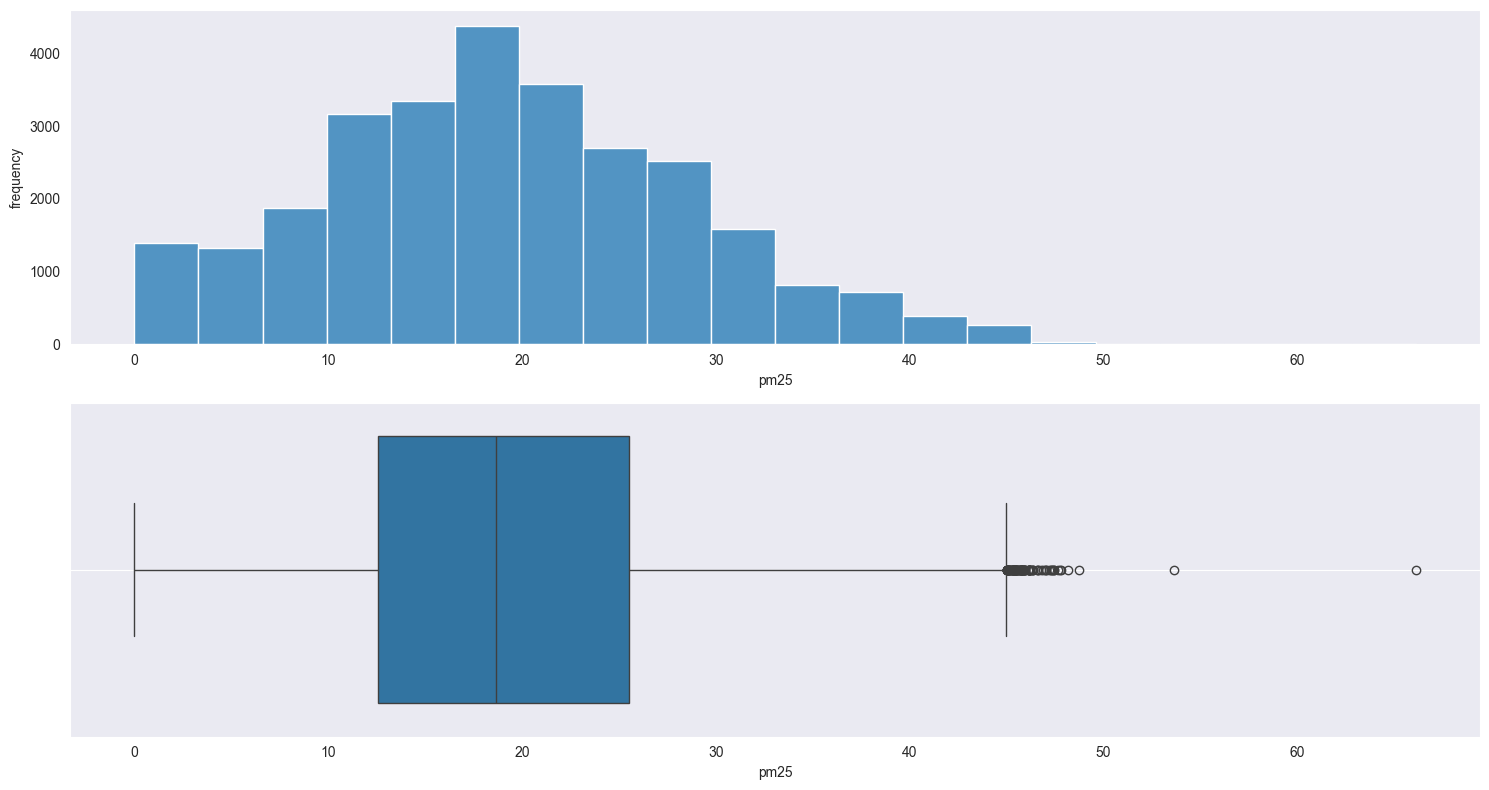

In [13]:
_, ax = plt.subplots(2,1, figsize=(15,8))
sns.histplot(df_pm25_aggr['data'], bins=20, kde=False, ax=ax[0])
ax[0].grid()
ax[0].set_xlabel('pm25')
ax[0].set_ylabel('frequency')
sns.boxplot(x=df_pm25_aggr['data'], ax=ax[1])
ax[1].set_xlabel('pm25')
ax[1].grid()
plt.tight_layout()
plt.show()

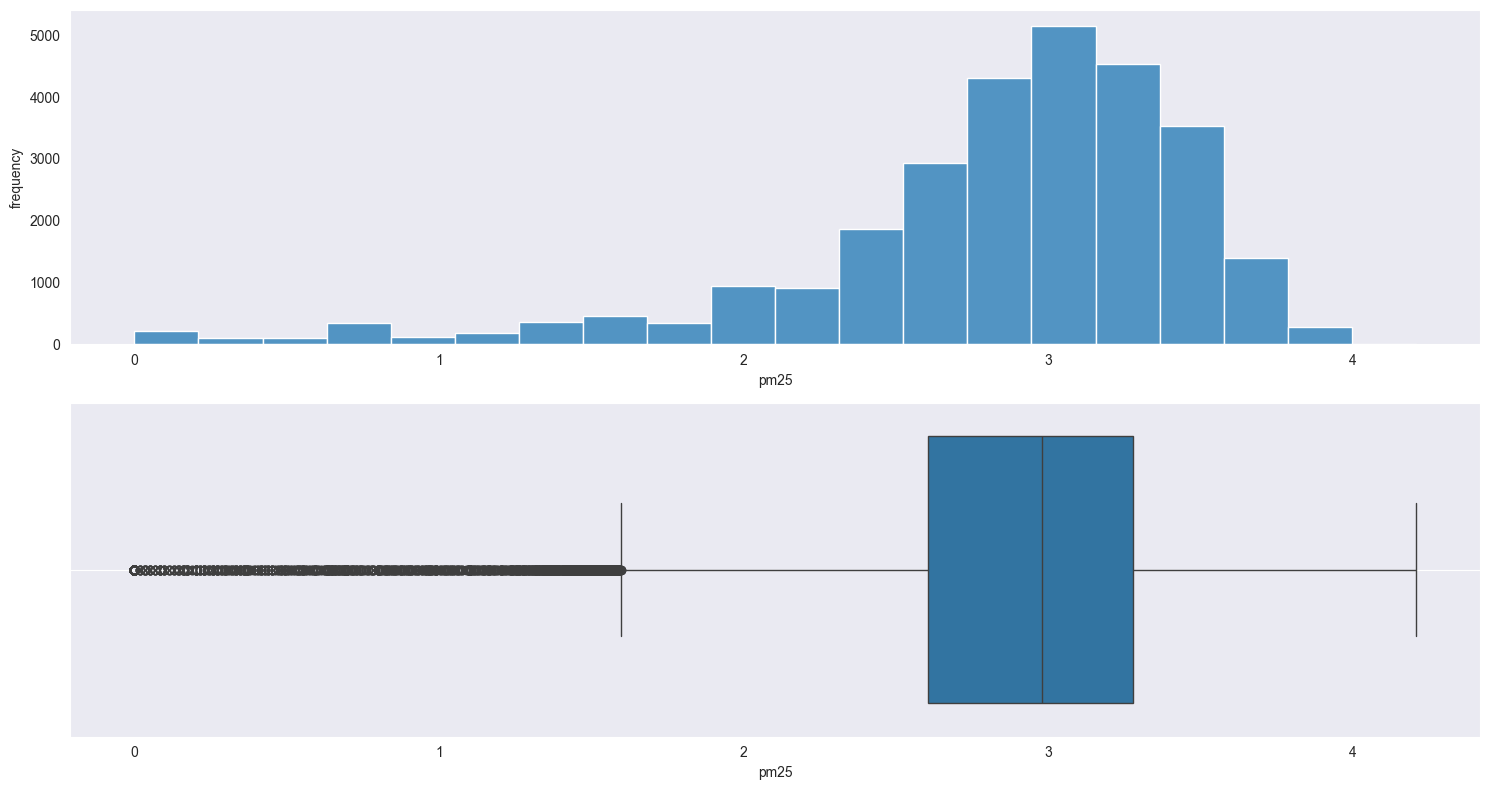

In [14]:
fig, ax = plt.subplots(2,1, figsize=(15,8))
sns.histplot(np.log(1+df_pm25_aggr['data']), bins=20, kde=False, ax=ax[0])
ax[0].grid()
ax[0].set_xlabel('pm25')
ax[0].set_ylabel('frequency')
sns.boxplot(x=np.log(1+df_pm25_aggr['data']), ax=ax[1])
ax[1].set_xlabel('pm25')
ax[1].grid()
plt.tight_layout()
plt.show()

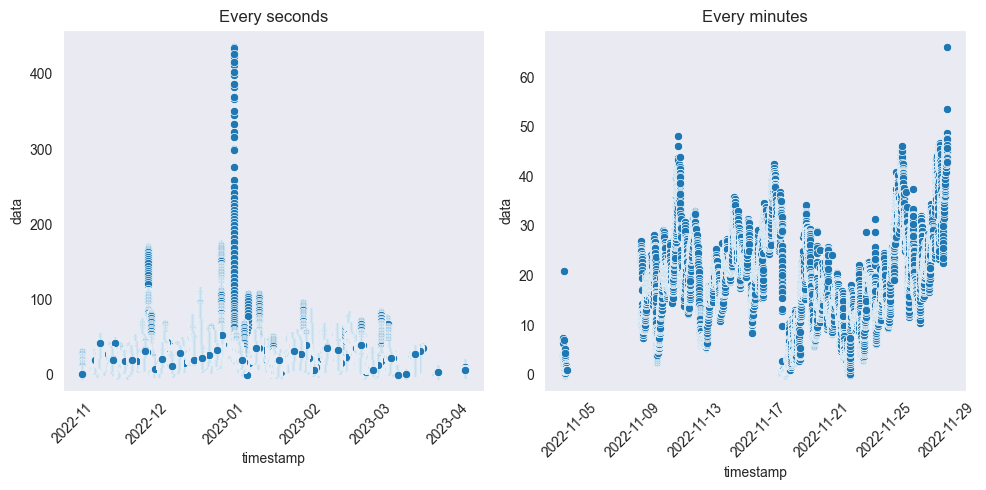

In [47]:
_, ax = plt.subplots(1,2, figsize=(10,5))
df_pm25_aggr_scatt = df_pm25_aggr.set_index('timestamp')
df_pm25_filtered_scatt = df_pm25_filtered.set_index('timestamp')

sns.scatterplot(data=df_pm25_filtered_scatt, x="timestamp", y="data", ax=ax[0])
ax[0].grid()
ax[0].set_title('Every seconds')
ax[0].tick_params(axis='x', labelrotation = 45)
sns.scatterplot(data=df_pm25_aggr_scatt, x="timestamp", y="data", ax=ax[1])
ax[1].grid()
ax[1].set_title('Every minutes')
ax[1].tick_params(axis='x', labelrotation = 45)
plt.tight_layout()
plt.show()

### Temp feature

Try to understand the seasonability of the temperature

In [16]:
df_temp = pd.read_csv('./dataset/s258.csv')  #°C
df_temp.drop_duplicates(inplace=True)
df_temp.timestamp = pd.to_datetime(df_temp.timestamp)

In [11]:
df_temp.describe()

,timestamp,data
count,3332826,3.332826e+06
mean,2023-01-11 13:00:58.771018496,1.155355e+01
min,2022-11-04 14:15:50,0.000000e+00
25%,2022-12-10 02:36:30,7.800000e+00
50%,2023-01-12 12:03:18,1.080000e+01
75%,2023-02-10 13:15:47.500000,1.460000e+01
max,2023-04-08 02:57:34,3.240000e+01
std,NaN,5.190221e+00


In [17]:
# Filter by range of dates
mask = (df_temp['timestamp'] >= START_DATE) & (df_temp['timestamp'] <= END_DATE)
df_temp_filtered = df_temp.loc[mask]

print(f'Original dataset length: {len(df_temp)}')
print(f'Minutes aggregate dataset length: {len(df_temp_filtered)}')
print(f'Removed the {round(100 - ((len(df_temp_filtered) * 100) / len(df_temp)), 2)}% of the original dataset')

Original dataset length: 3332826
Minutes aggregate dataset length: 557852
Removed the 83.26% of the original dataset


In [18]:
df_temp_aggr = df_temp_filtered.groupby(pd.Grouper(key='timestamp', freq='min')).mean().reset_index()

print(f'Original dataset length: {len(df_temp_filtered)}')
print(f'Minutes aggregate dataset length: {len(df_temp_aggr)}')
print(f'Removed the {round(100 - ((len(df_temp_aggr) * 100) / len(df_temp_filtered)), 2)}% of the original dataset')

Original dataset length: 557852
Minutes aggregate dataset length: 35145
Removed the 93.7% of the original dataset


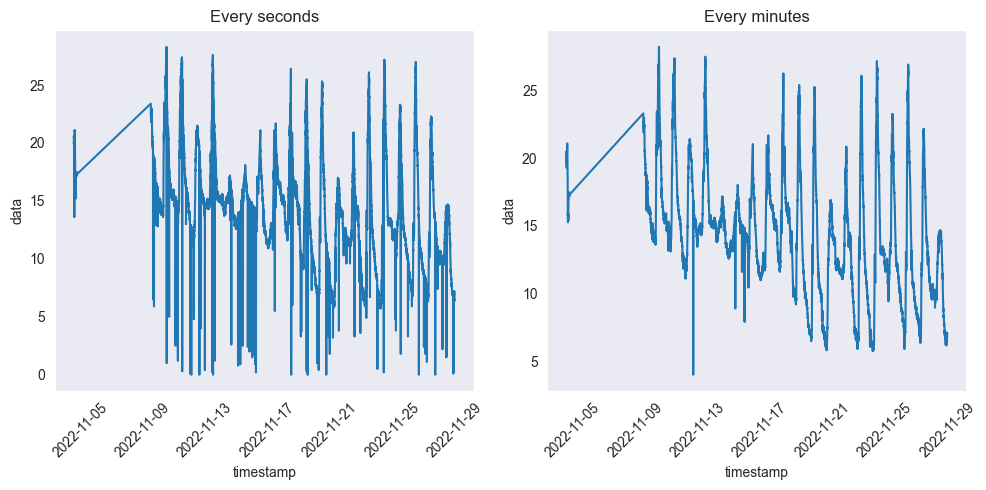

In [29]:
_, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x="timestamp", y="data", data=df_temp_filtered, ax=ax[0])
ax[0].grid()
ax[0].set_title('Every seconds')
ax[0].tick_params(axis='x', labelrotation = 45)
sns.lineplot(x="timestamp", y="data", data=df_temp_aggr, ax=ax[1])
ax[1].grid()
ax[1].set_title('Every minutes')
ax[1].tick_params(axis='x', labelrotation = 45)
plt.tight_layout()
plt.show()

### RH feature

We exepct that the data distribution is still similar to a Guassian variable because it's value is a percentage

In [30]:
df_rh = pd.read_csv('./dataset/s259.csv')  #%
df_rh.drop_duplicates(inplace=True)
df_rh.timestamp = pd.to_datetime(df_rh.timestamp)

In [21]:
df_rh.describe()

,timestamp,data
count,3332821,3.332821e+06
mean,2023-01-11 13:00:59.801154048,5.680516e+01
min,2022-11-04 14:15:50,0.000000e+00
25%,2022-12-10 02:36:33,4.780000e+01
50%,2023-01-12 12:03:23,6.100000e+01
75%,2023-02-10 13:15:44,6.860000e+01
max,2023-04-08 02:57:34,8.720000e+01
std,NaN,1.434070e+01


In [31]:
# Filter by range of dates
mask = (df_rh['timestamp'] >= START_DATE) & (df_rh['timestamp'] <= END_DATE)
df_rh_filtered = df_rh.loc[mask]

print(f'Original dataset length: {len(df_rh)}')
print(f'Minutes aggregate dataset length: {len(df_rh_filtered)}')
print(f'Removed the {round(100 - ((len(df_rh_filtered) * 100) / len(df_rh)), 2)}% of the original dataset')

Original dataset length: 3332821
Minutes aggregate dataset length: 557850
Removed the 83.26% of the original dataset


In [32]:
df_rh_aggr = df_rh_filtered.groupby(pd.Grouper(key='timestamp', freq='min')).mean().reset_index()

print(f'Original dataset length: {len(df_rh_filtered)}')
print(f'Minutes aggregate dataset length: {len(df_rh_aggr)}')
print(f'Removed the {round(100 - ((len(df_rh_aggr) * 100) / len(df_rh_filtered)), 2)}% of the original dataset')

Original dataset length: 557850
Minutes aggregate dataset length: 35145
Removed the 93.7% of the original dataset


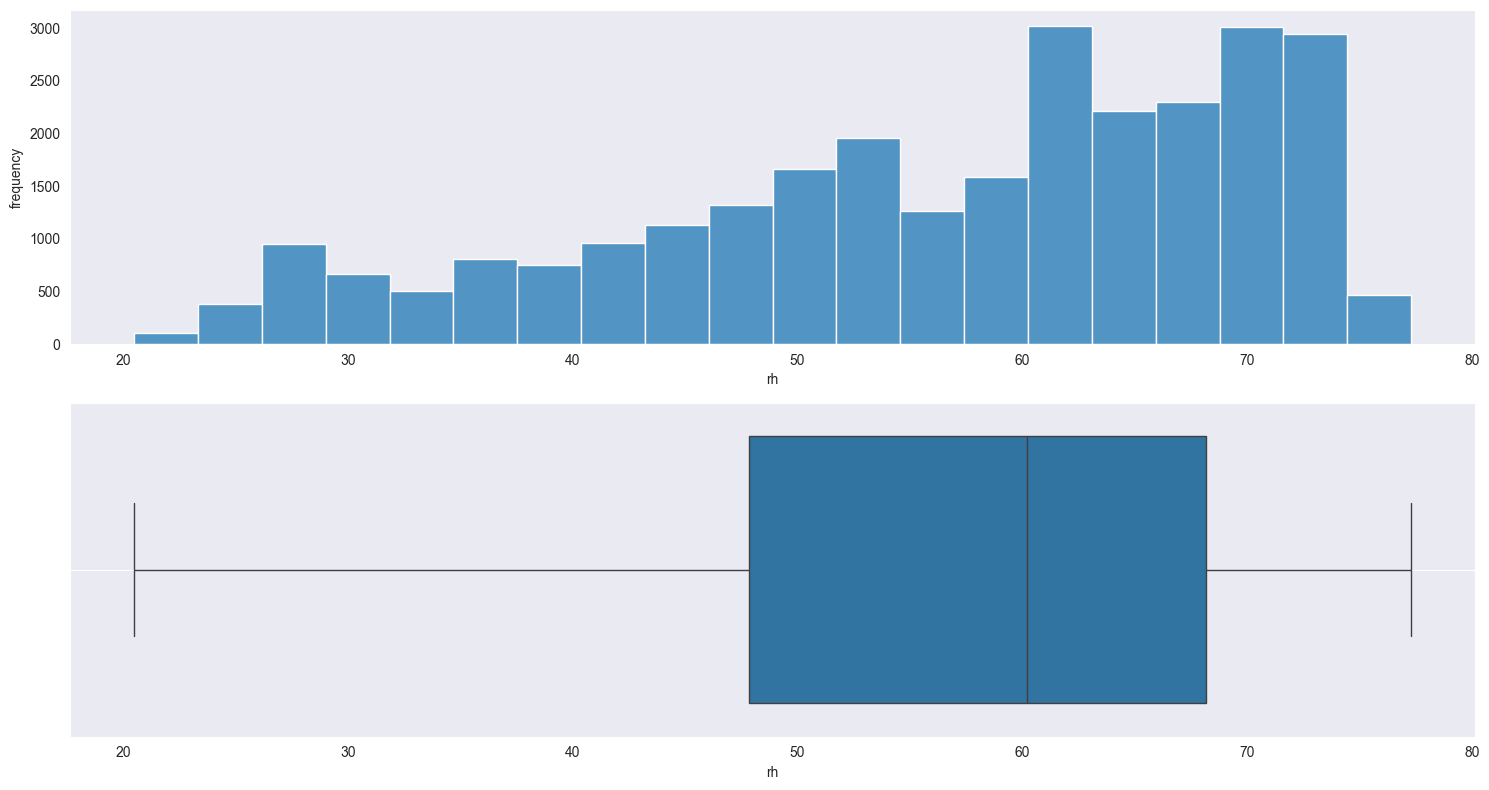

In [33]:
_, ax = plt.subplots(2,1, figsize=(15,8))
sns.histplot(df_rh_aggr['data'], bins=20, kde=False, ax=ax[0])
ax[0].grid()
ax[0].set_xlabel('rh')
ax[0].set_ylabel('frequency')
sns.boxplot(x=df_rh_aggr['data'], ax=ax[1])
ax[1].set_xlabel('rh')
ax[1].grid()
plt.tight_layout()
plt.show()

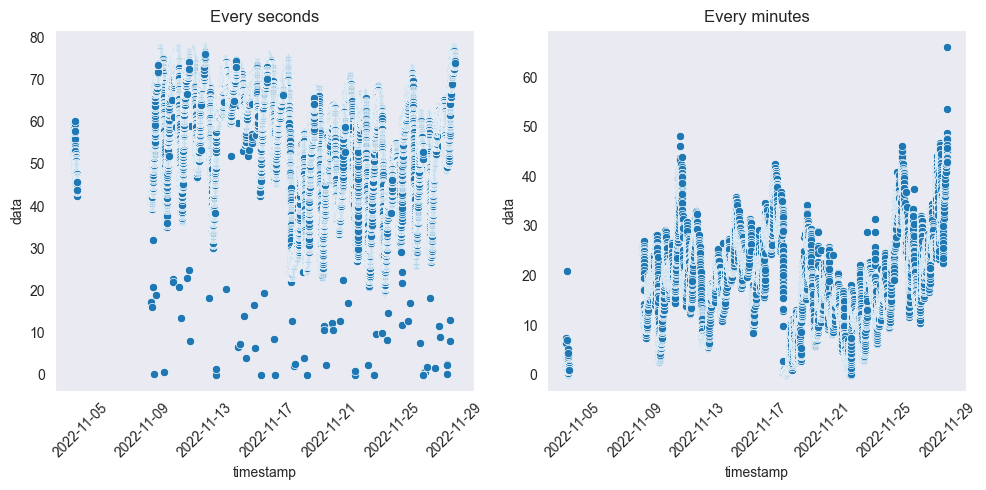

In [35]:
_, ax = plt.subplots(1,2, figsize=(10,5))
df_rh_aggr_scatt = df_rh_aggr.set_index('timestamp')
df_rh_filtered_scatt = df_rh_filtered.set_index('timestamp')

sns.scatterplot(data=df_rh_filtered_scatt, x="timestamp", y="data", ax=ax[0])
ax[0].grid()
ax[0].set_title('Every seconds')
ax[0].tick_params(axis='x', labelrotation = 45)
sns.scatterplot(data=df_pm25_aggr_scatt, x="timestamp", y="data", ax=ax[1])
ax[1].grid()
ax[1].set_title('Every minutes')
ax[1].tick_params(axis='x', labelrotation = 45)
plt.tight_layout()
plt.show()

### Press feature

Si distribuisce piuttosto bene in modo naturale

In [37]:
df_press = pd.read_csv('./dataset/s260.csv')  #hpa
df_press.drop_duplicates(inplace=True)
df_press.timestamp = pd.to_datetime(df_press.timestamp)

In [15]:
df_press.describe()

,timestamp,data
count,2004054,2.004054e+06
mean,2023-01-11 00:00:28.612169472,9.882595e+02
min,2022-10-13 07:33:54,9.587860e+02
25%,2022-12-09 23:02:16.249999872,9.815282e+02
50%,2023-01-11 19:38:46.500000,9.893758e+02
75%,2023-02-09 21:20:53.750000128,9.951255e+02
max,2023-04-08 00:42:28,1.247766e+03
std,NaN,9.945548e+00


In [38]:
# Filter by range of dates
mask = (df_press['timestamp'] >= START_DATE) & (df_press['timestamp'] <= END_DATE)
df_press_filtered = df_press.loc[mask]

print(f'Original dataset length: {len(df_press)}')
print(f'Minutes aggregate dataset length: {len(df_press_filtered)}')
print(f'Removed the {round(100 - ((len(df_press_filtered) * 100) / len(df_press)), 2)}% of the original dataset')

Original dataset length: 2004054
Minutes aggregate dataset length: 335762
Removed the 83.25% of the original dataset


In [39]:
df_press_aggr = df_press_filtered.groupby(pd.Grouper(key='timestamp', freq='min')).mean().reset_index()

print(f'Original dataset length: {len(df_press_filtered)}')
print(f'Minutes aggregate dataset length: {len(df_press_aggr)}')
print(f'Removed the {round(100 - ((len(df_press_aggr) * 100) / len(df_press_filtered)), 2)}% of the original dataset')

Original dataset length: 335762
Minutes aggregate dataset length: 35145
Removed the 89.53% of the original dataset


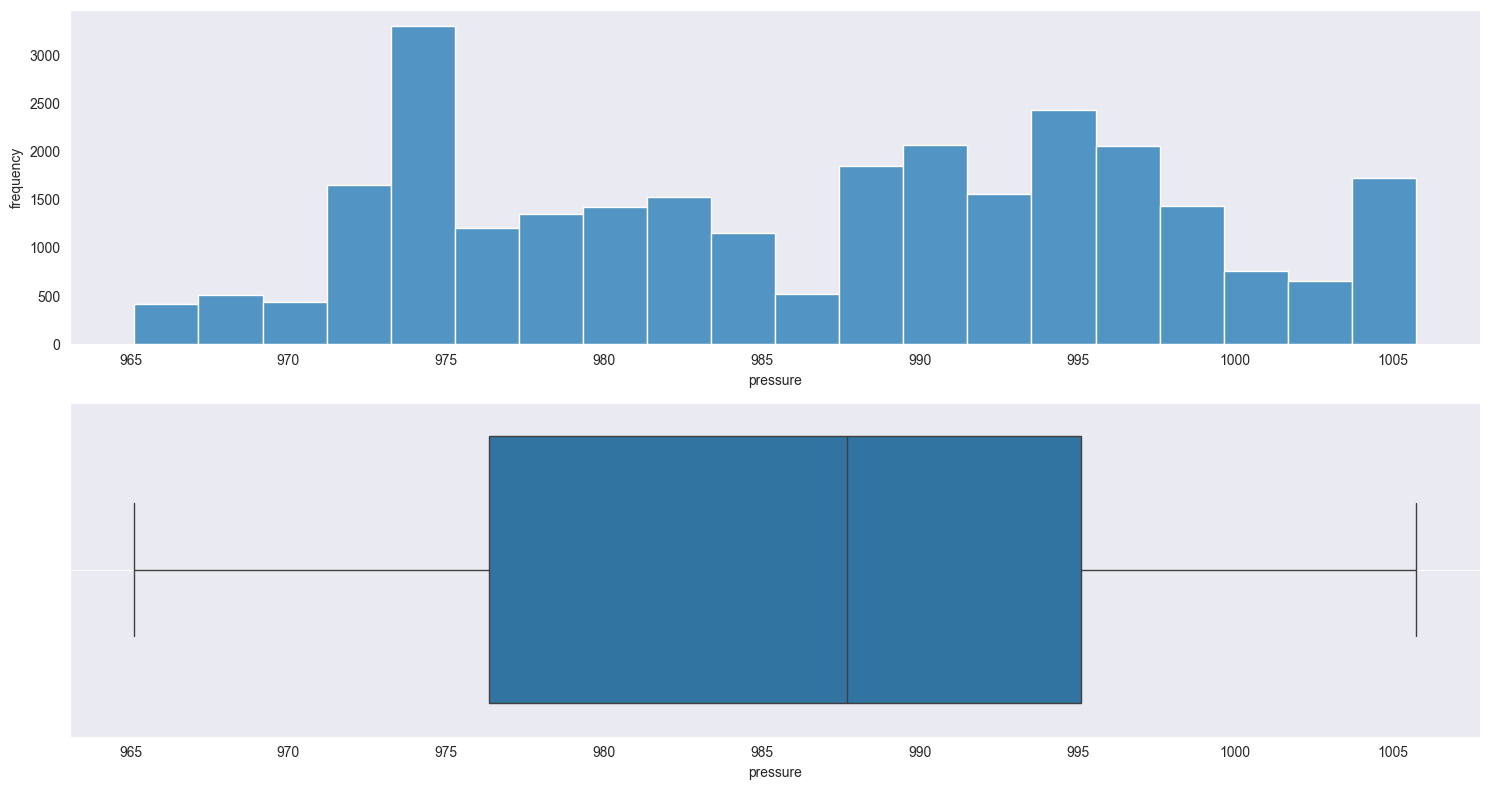

In [40]:
_, ax = plt.subplots(2,1, figsize=(15,8))
sns.histplot(df_press_aggr['data'], bins=20, kde=False, ax=ax[0])
ax[0].grid()
ax[0].set_xlabel('pressure')
ax[0].set_ylabel('frequency')
sns.boxplot(x=df_press_aggr['data'], ax=ax[1])
ax[1].set_xlabel('pressure')
ax[1].grid()
plt.tight_layout()
plt.show()

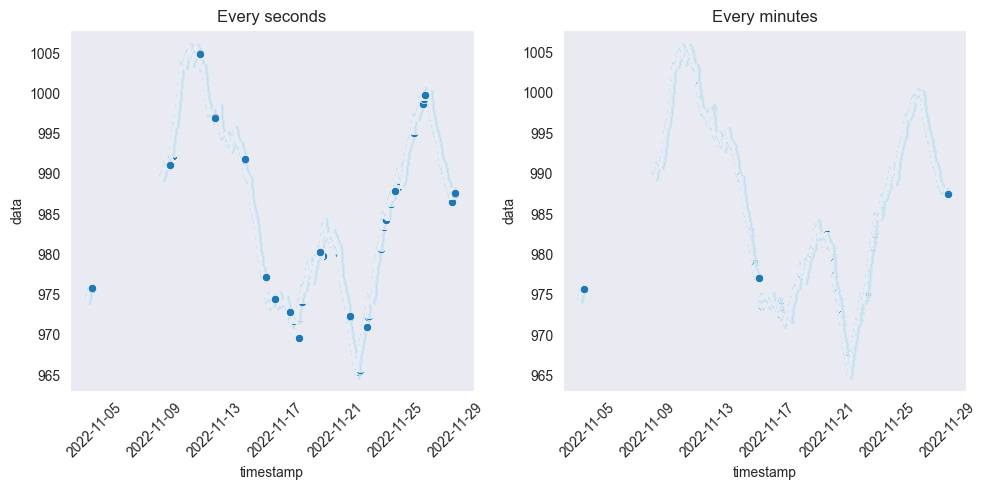

In [41]:
_, ax = plt.subplots(1,2, figsize=(10,5))
df_press_aggr_scatt = df_press_aggr.set_index('timestamp')
df_press_filtered_scatt = df_press_filtered.set_index('timestamp')

sns.scatterplot(data=df_press_filtered_scatt, x="timestamp", y="data", ax=ax[0])
ax[0].grid()
ax[0].set_title('Every seconds')
ax[0].tick_params(axis='x', labelrotation = 45)
sns.scatterplot(data=df_press_aggr_scatt, x="timestamp", y="data", ax=ax[1])
ax[1].grid()
ax[1].set_title('Every minutes')
ax[1].tick_params(axis='x', labelrotation = 45)
plt.tight_layout()
plt.show()